# Entendimiento del negocio

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

#Se cargan y observan los datos
data_frame = pd.read_csv("3_2_3_adult.csv")
data_frame

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Entendimiento de los datos

In [2]:
#Se observan los tipos de datos existentes
#Se deciden las principales variables a utilizar, como lo son edad,sexo, ingreso, numero de educación,etc.
data_frame.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [3]:
#Se utiliza el metodo .describe que muestra datos estadísticos del dataframe
data_frame.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Se puede apreciar que, en la columna edad, el último cuartil tiene un intervalo mucho mayor a los demas cuartiles, pasando de 48 a 90.

In [4]:
#revisamos los valores unicos de cada columna
for feature in data_frame.columns:
    print('Valores unicos de', feature, '=', data_frame[feature].unique())

Valores unicos de age = [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Valores unicos de workclass = ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Valores unicos de fnlwgt = [ 77053 132870 186061 ...  34066  84661 257302]
Valores unicos de education = ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Valores unicos de education.num = [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Valores unicos de marital.status = ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Valores unicos de occupation = ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 

In [5]:
#se agrupan los datos para crear intervalos para dicha columna
print(data_frame.groupby('income').size())

income
<=50K    24720
>50K      7841
dtype: int64


# Preparacion de los datos

In [6]:
#Se crea un intervalo con los digitos utilizados para la edad
bins = [16, 30, 50, 70, 90, 100]
#Se le asigna un nombre a cada intervalo
groups = ['17-30','31-50','51-70','71-90', '91-100']
#Se cargan los datos en una nueva tabla llamada 'edad'
data_frame['age'] = pd.cut(data_frame['age'],bins , labels = groups)

#Se reemplazan los valores '?' con nulos
data_frame["workclass"] = data_frame["workclass"].replace("?",np.nan)
data_frame["occupation"] = data_frame["occupation"].replace("?",np.nan)
data_frame["native.country"] = data_frame["native.country"].replace("?",np.nan)

#Se reemplazan los valores masculinos y femeninos por un 0 y 1 respectivamente, para posteriormente
#utilizarlos como un eje principal, actualmente quedan definidos como un boolean, es decir un si y no
data_frame["sex"] = data_frame["sex"].replace("Female",0)
data_frame["sex"] = data_frame["sex"].replace("Male",1)

#Se hace lo mismo que se hizo con sexo pero esta vez con la variable de ingresos, dividiendolos en las
#personas que cuenten con un ingreso mayor o menor a 50K
data_frame["income"] = data_frame["income"].replace("<=50K",0)
data_frame["income"] = data_frame["income"].replace(">50K",1)

#Se crea una condicion en la cual se clasificarán por la nacionalidad del registrado, inicialmente
#la distribución de las nacionalidades era muy dispareja, por lo cual se redujo a 2 posibilidades, la
#que corresponde a los estadounidenses y a los que no lo son. Equiparando lo mas posible los registros 
data_frame['native.country'] = data_frame['native.country'].replace("United-States","American")
data_frame['native.country'] = data_frame['native.country'].mask(data_frame['native.country']!='American','Non-American') 

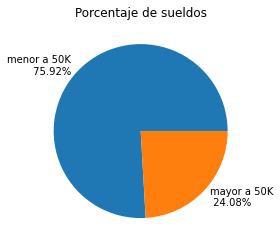

In [7]:
#Del dataframe, se selecciona la columna ingreso para graficar la distribución de los datos en un grafico tipo pie
clases = np.array([data_frame[data_frame.income == 0].shape[0], data_frame[data_frame.income == 1].shape[0]])
labels = [str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]

labels[0] = 'menor a 50K\n ' + labels[0]
labels[1] = 'mayor a 50K\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de sueldos')
plt.show()

In [8]:
#Se muestra la moda de las columnas para reemplazar los valores nulos
print('Workclass:', data_frame['workclass'].describe().top)
print('Occupation:', data_frame['occupation'].describe().top)
print('Native.country:', data_frame['native.country'].describe().top)

Workclass: Private
Occupation: Prof-specialty
Native.country: American


Para esta parte, se tenian dos posibilidades, mantener las filas utilizando la moda para no alterar los resultados o eliminando el 7% de valores nulos del dataframe.
Se decidió por no eliminar los valores nulos ya que, aun que fuese un mínimo de pérdida de datos, esta pérdida podía afectar el resultado final.

In [9]:
#Los valores nulos anteriores se reemplazan
data_frame["workclass"] = data_frame["workclass"].fillna('Private')
data_frame["occupation"] = data_frame["occupation"].fillna('Prof-specialty')
data_frame["native.country"] = data_frame["native.country"].fillna('American')

In [10]:
#Revisamos que los cambios se hicieron
for feature in data_frame.columns:
    print('Valores unicos de', feature, '=', data_frame[feature].unique())

Valores unicos de age = ['71-90', '51-70', '31-50', '17-30']
Categories (5, object): ['17-30' < '31-50' < '51-70' < '71-90' < '91-100']
Valores unicos de workclass = ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Valores unicos de fnlwgt = [ 77053 132870 186061 ...  34066  84661 257302]
Valores unicos de education = ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Valores unicos de education.num = [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Valores unicos de marital.status = ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Valores unicos de occupation = ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-su

In [11]:
#Se agrupa 'workclass'
data_frame["workclass"] = data_frame["workclass"].replace(["State-gov","Federal-gov","Local-gov"],"Gov")
data_frame["workclass"] = data_frame["workclass"].replace(["Self-emp-not-inc","Self-emp-inc"],"Self-emp")
data_frame["workclass"] = data_frame["workclass"].replace(["Without-pay","Never-worked"],"Never-pay")

#Se agrupa 'race'
data_frame["race"] = data_frame["race"].mask(data_frame["race"]!="White","Non-White")


In [12]:
#Se realiza el OneHotEncoding para 'race'
encoded_race = pd.get_dummies(data_frame['race'])
data_frame = pd.concat([data_frame,encoded_race],axis=1)

#Se realiza el OneHotEncoding para 'workclass'
encoded_workclass = pd.get_dummies(data_frame['workclass'])
data_frame = pd.concat([data_frame,encoded_workclass],axis=1)

#Se realiza el OneHotEncoding para 'occupation'
encoded_occupation = pd.get_dummies(data_frame['occupation'])
data_frame = pd.concat([data_frame,encoded_occupation],axis=1)

#Se realiza el OneHotEncoding para 'native.country'
encoded_nc = pd.get_dummies(data_frame['native.country'])
data_frame = pd.concat([data_frame,encoded_nc],axis=1)

#Se realiza el OneHotEncoding para 'age'
encoded_age = pd.get_dummies(data_frame['age'])
data_frame = pd.concat([data_frame,encoded_age],axis=1)

#Se eliminan las columnas que fueron transformadas
data_frame = data_frame.drop(['race','workclass','occupation','native.country', 'age'], axis=1)

In [13]:
#Revisamos que los cambios se hayan realizado
data_frame.head()

,fnlwgt,education,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income,...,Sales,Tech-support,Transport-moving,American,Non-American,17-30,31-50,51-70,71-90,91-100
0,77053,HS-grad,9,Widowed,Not-in-family,0,0,4356,40,0,...,0,0,0,1,0,0,0,0,1,0
1,132870,HS-grad,9,Widowed,Not-in-family,0,0,4356,18,0,...,0,0,0,1,0,0,0,0,1,0
2,186061,Some-college,10,Widowed,Unmarried,0,0,4356,40,0,...,0,0,0,1,0,0,0,1,0,0
3,140359,7th-8th,4,Divorced,Unmarried,0,0,3900,40,0,...,0,0,0,1,0,0,0,1,0,0
4,264663,Some-college,10,Separated,Own-child,0,0,3900,40,0,...,0,0,0,1,0,0,1,0,0,0


In [14]:
#Revisamos los tipos de datos para saber que columnas eliminar (tipo objeto)
data_frame.dtypes

fnlwgt                int64
education            object
education.num         int64
marital.status       object
relationship         object
sex                   int64
capital.gain          int64
capital.loss          int64
hours.per.week        int64
income                int64
Non-White             uint8
White                 uint8
Gov                   uint8
Never-pay             uint8
Private               uint8
Self-emp              uint8
Adm-clerical          uint8
Armed-Forces          uint8
Craft-repair          uint8
Exec-managerial       uint8
Farming-fishing       uint8
Handlers-cleaners     uint8
Machine-op-inspct     uint8
Other-service         uint8
Priv-house-serv       uint8
Prof-specialty        uint8
Protective-serv       uint8
Sales                 uint8
Tech-support          uint8
Transport-moving      uint8
American              uint8
Non-American          uint8
17-30                 uint8
31-50                 uint8
51-70                 uint8
71-90               

In [15]:
#Eliminamos las columnas tipo objeto
data_frame = data_frame.drop(['education', 'marital.status','relationship'], axis=1)

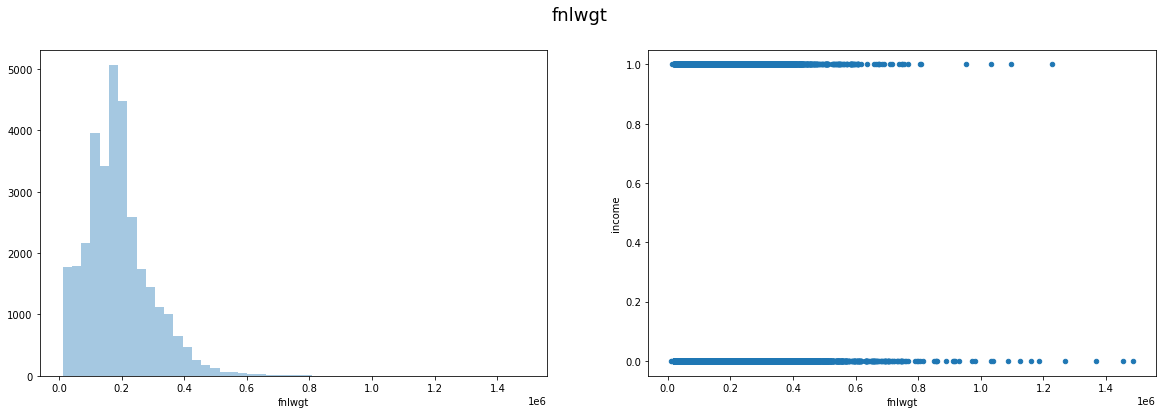

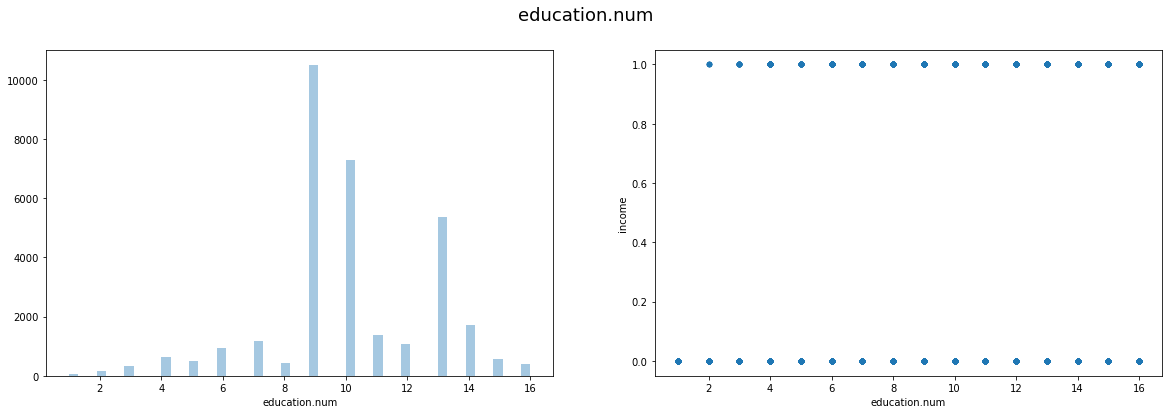

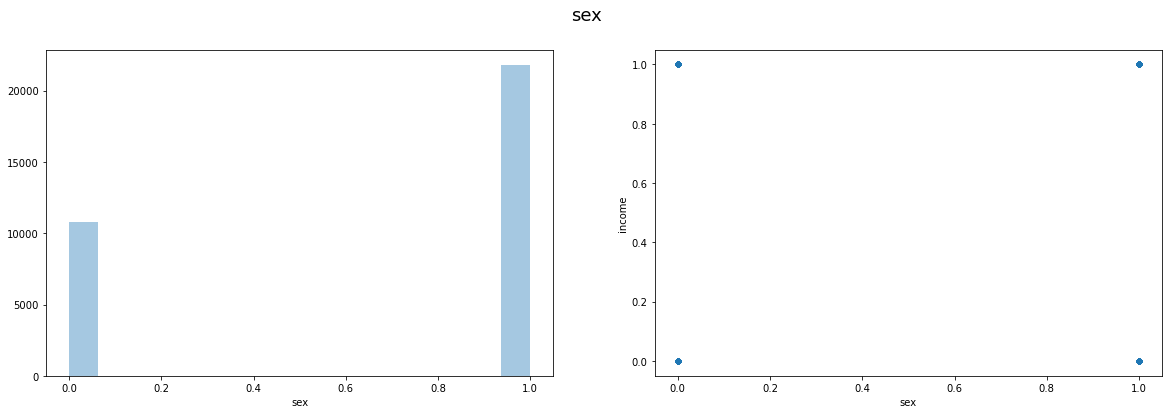

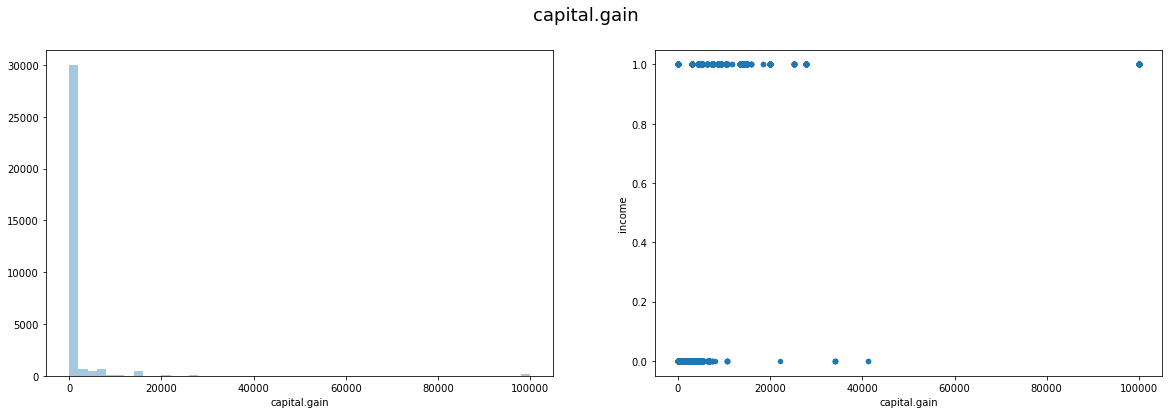

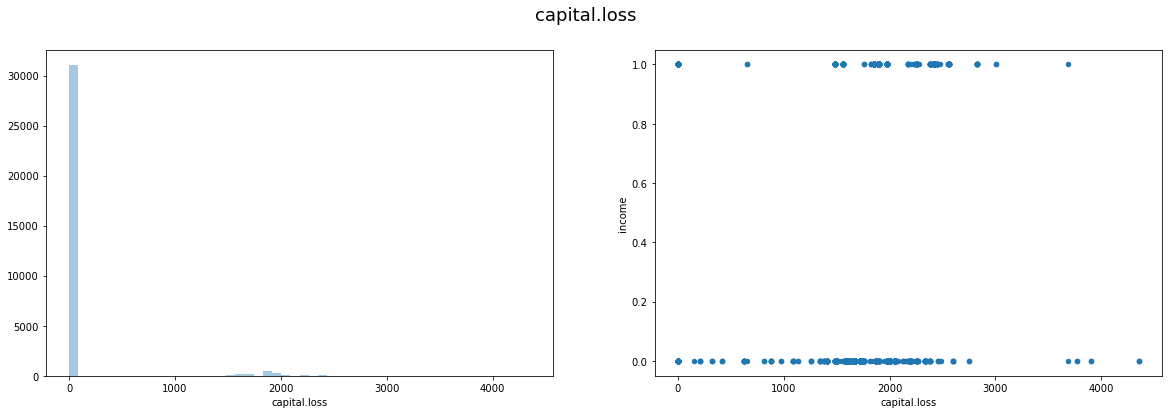

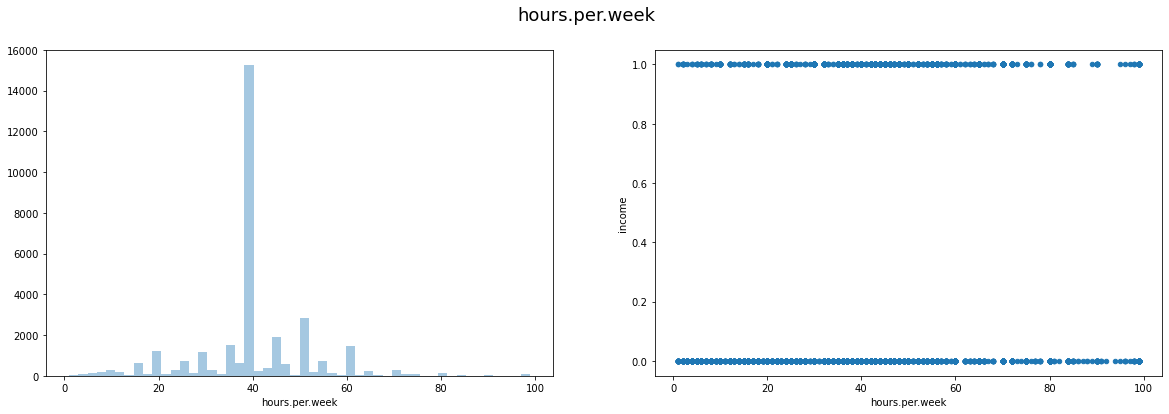

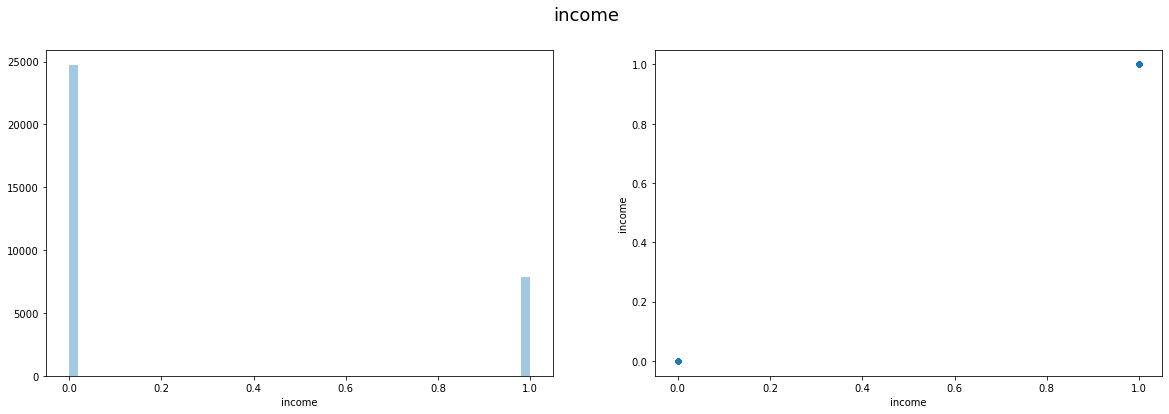

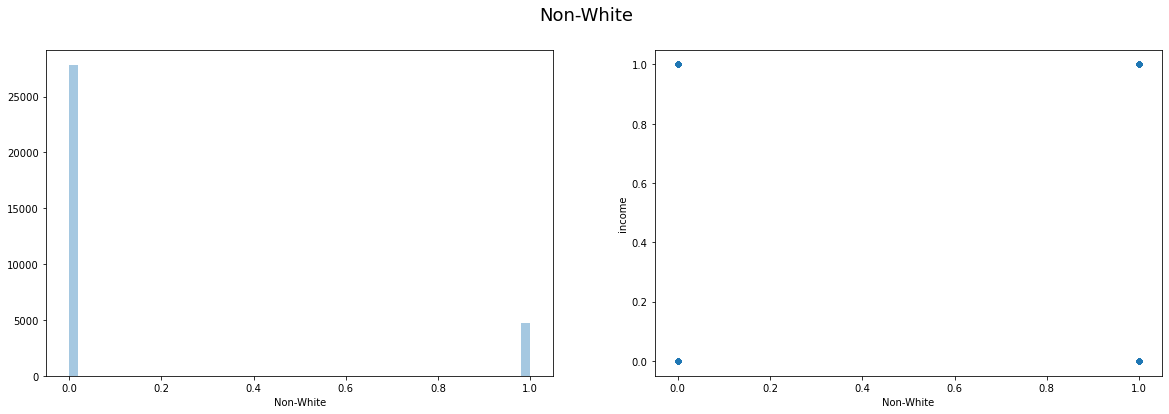

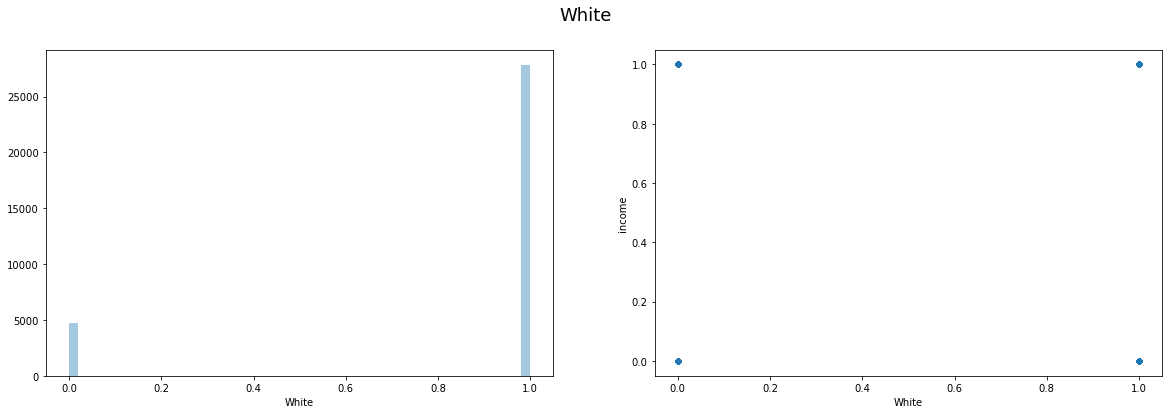

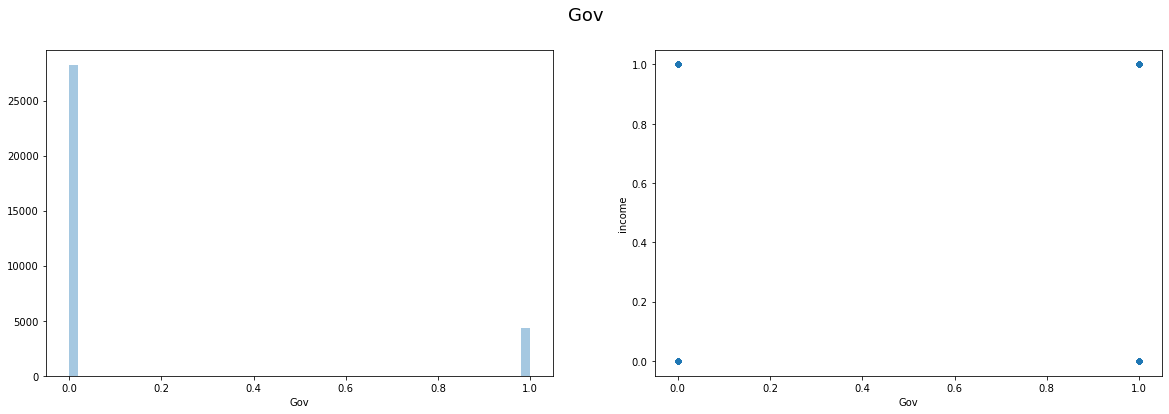

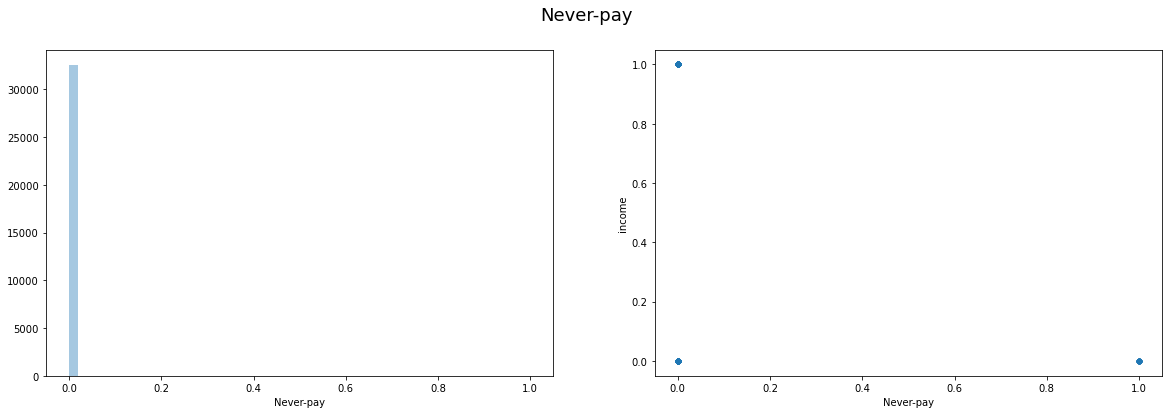

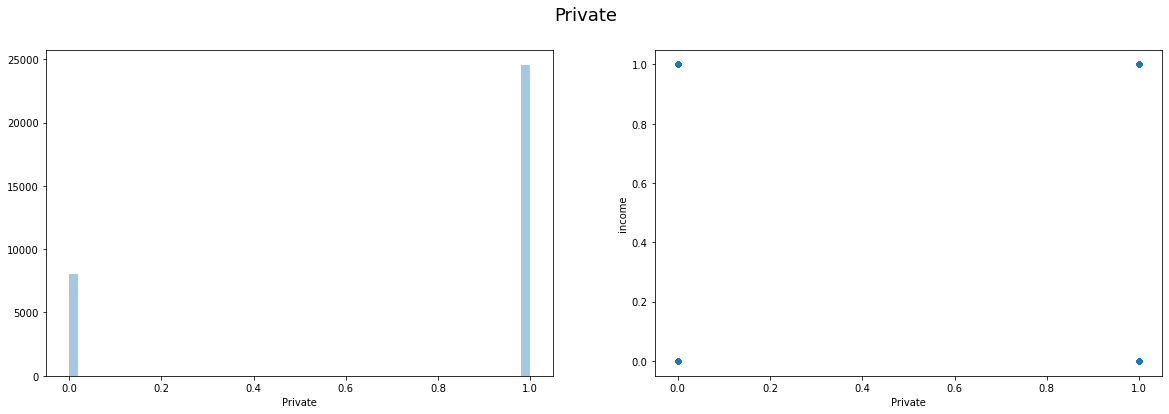

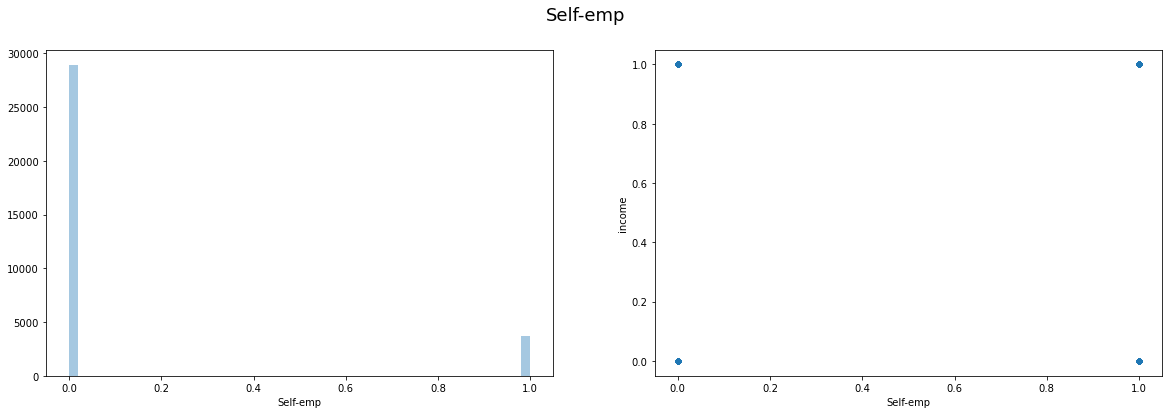

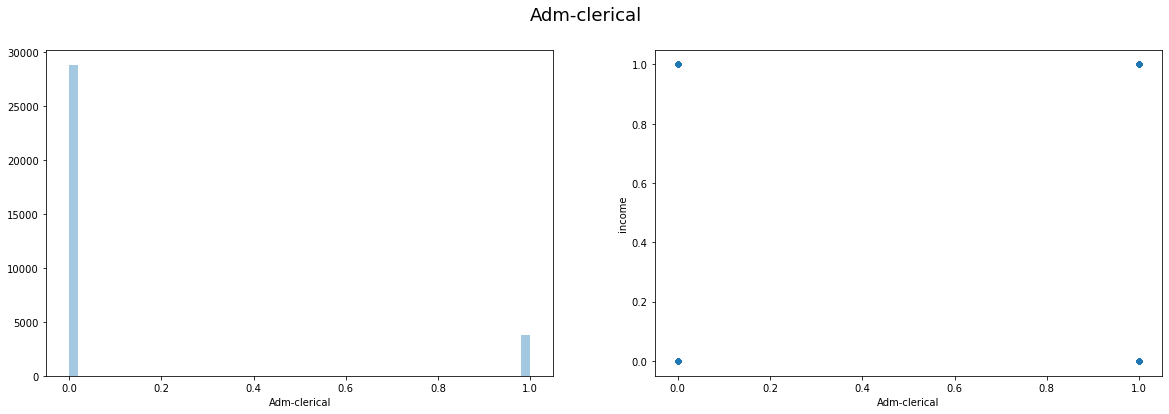

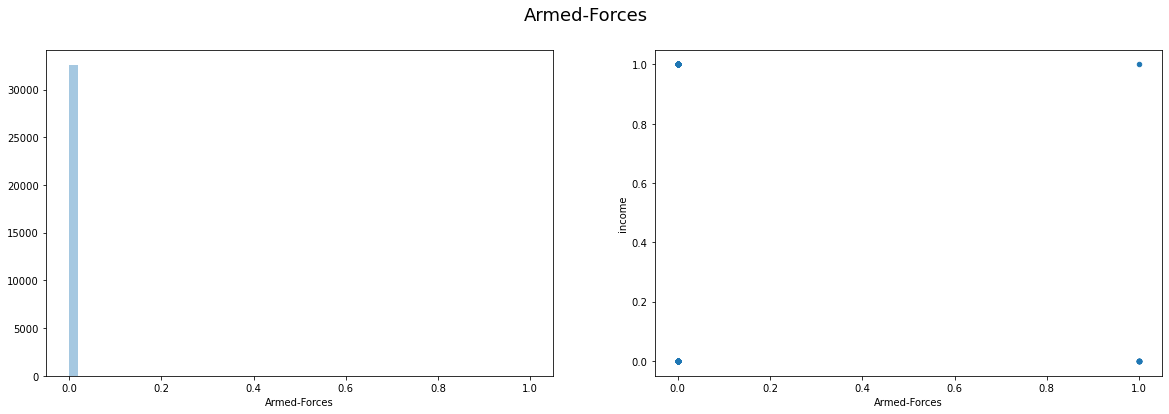

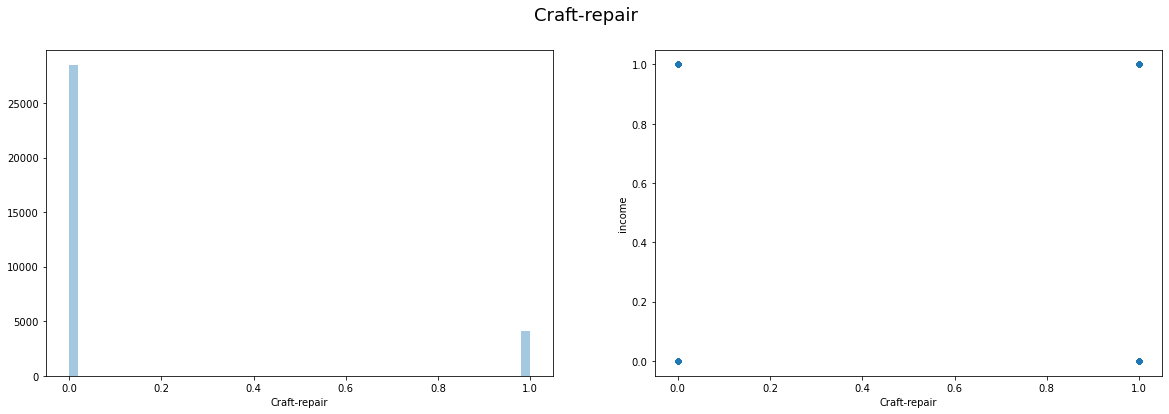

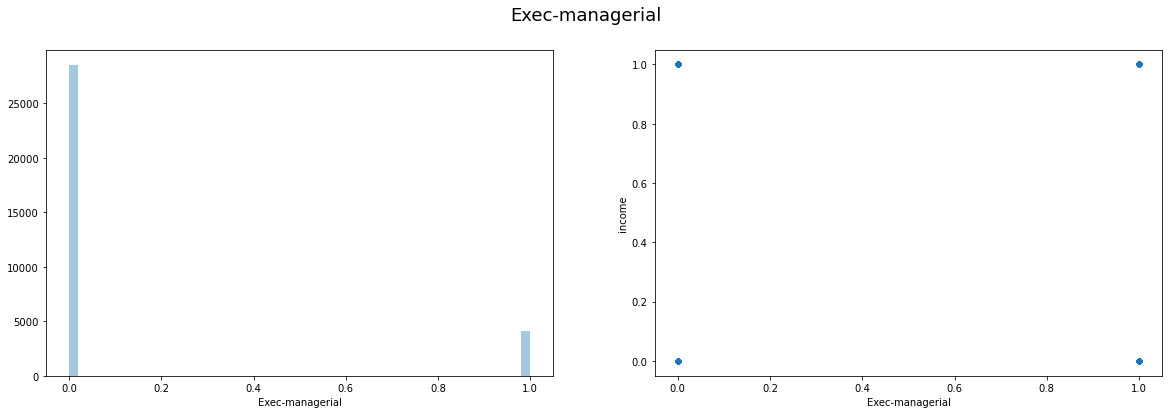

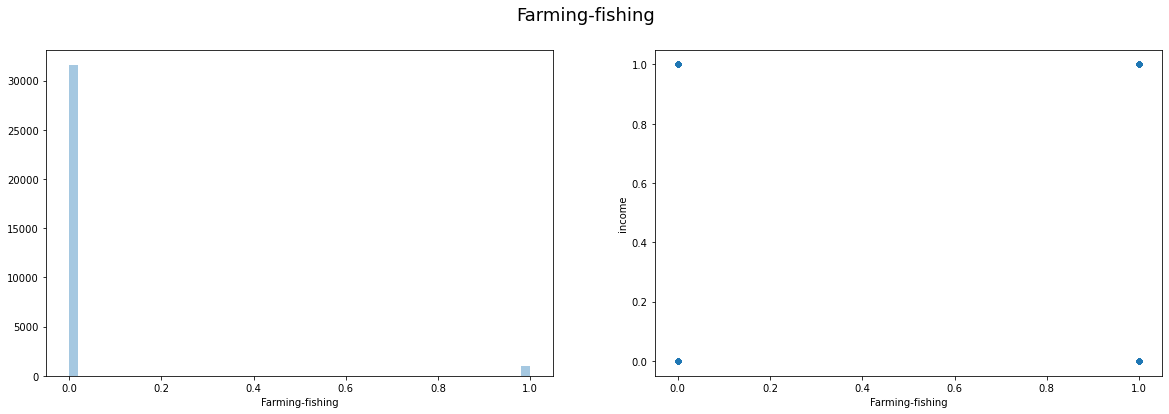

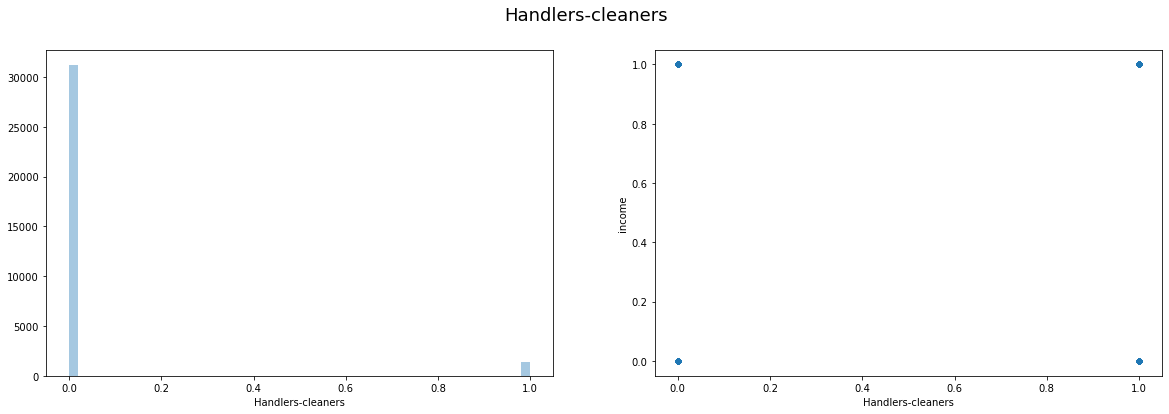

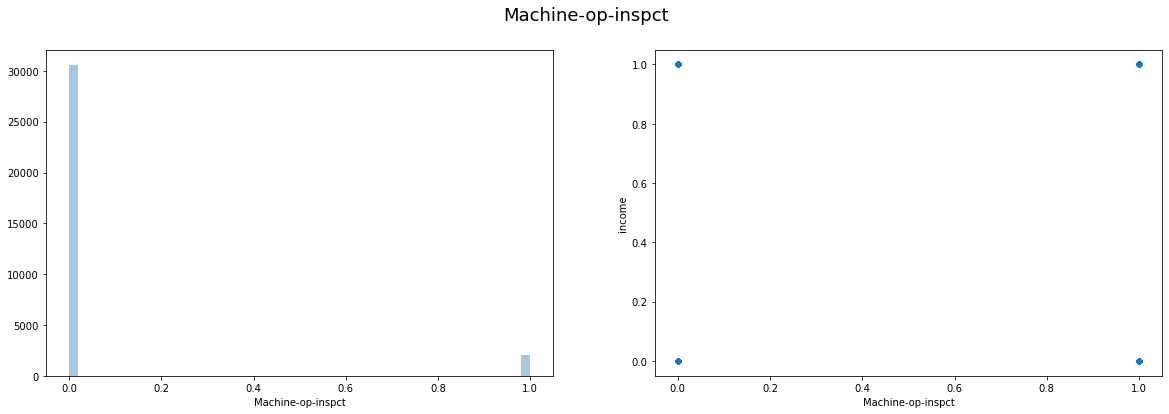

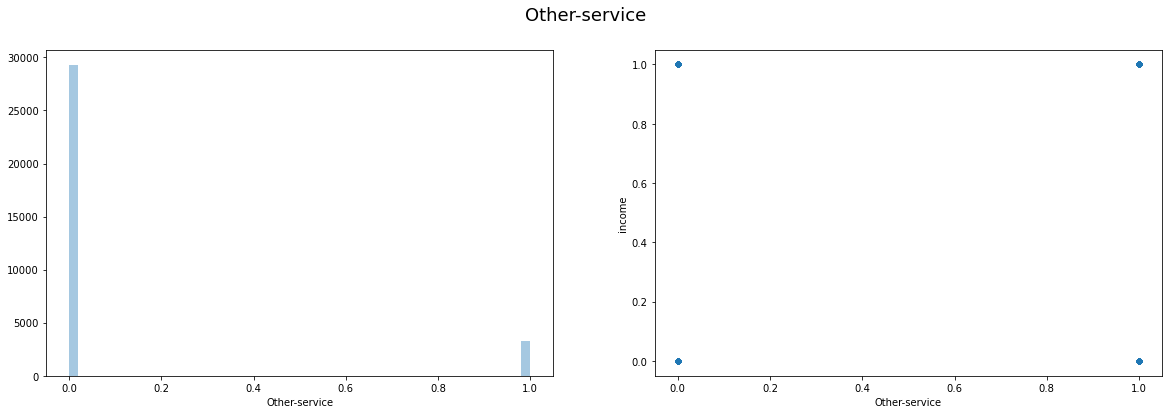

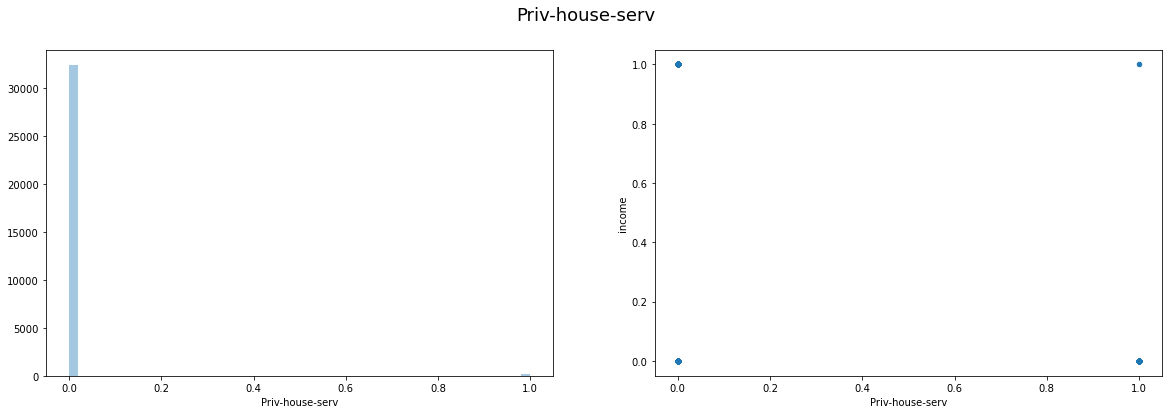

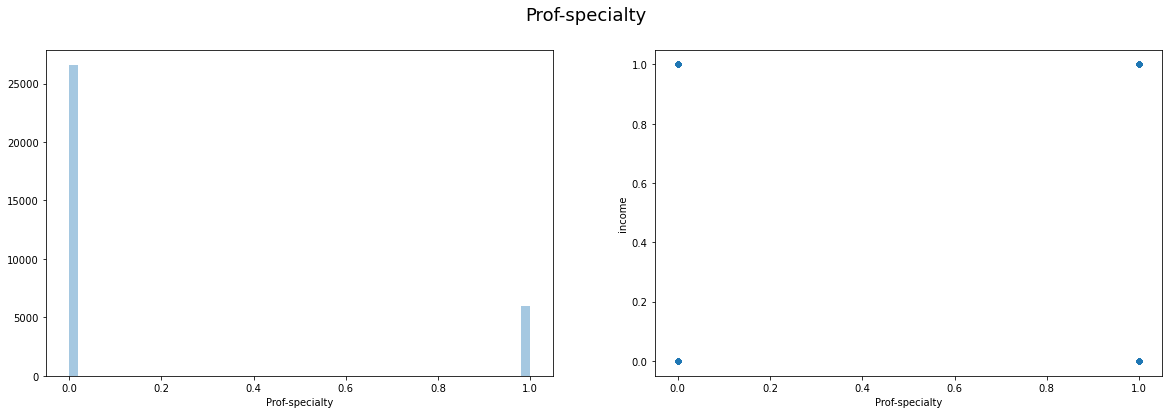

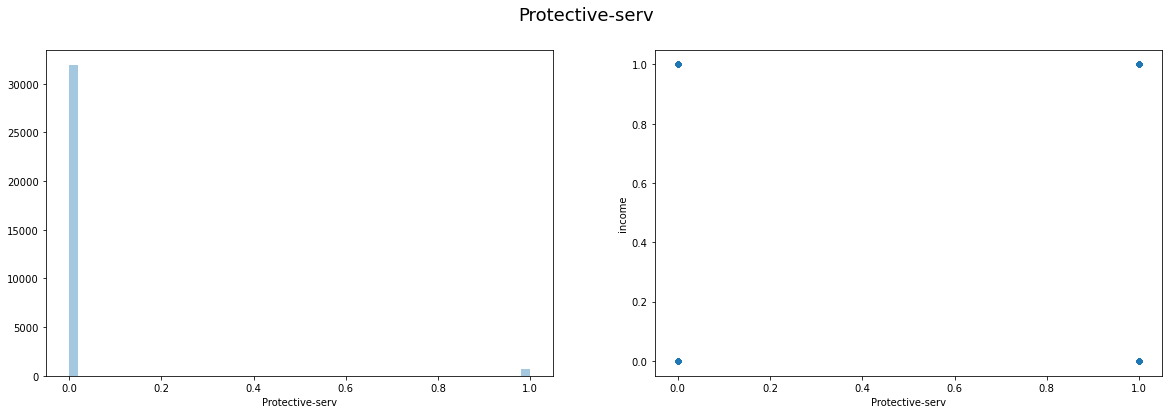

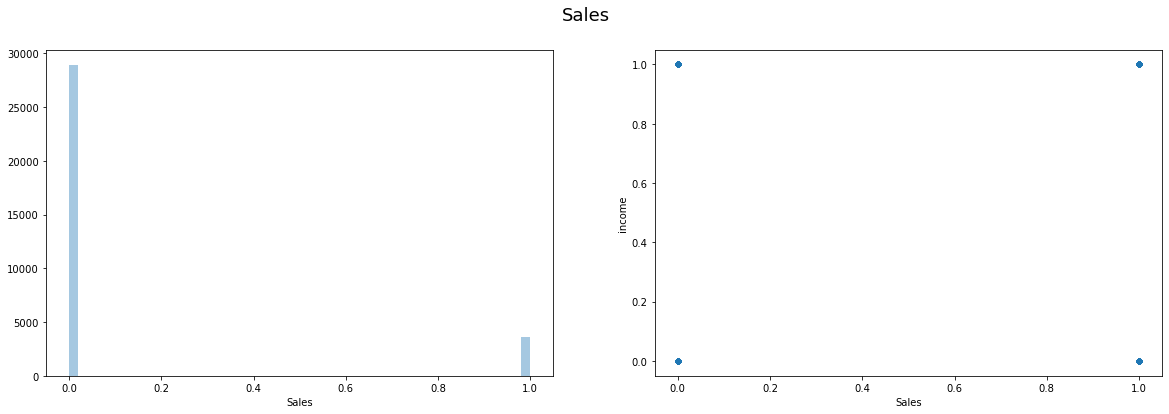

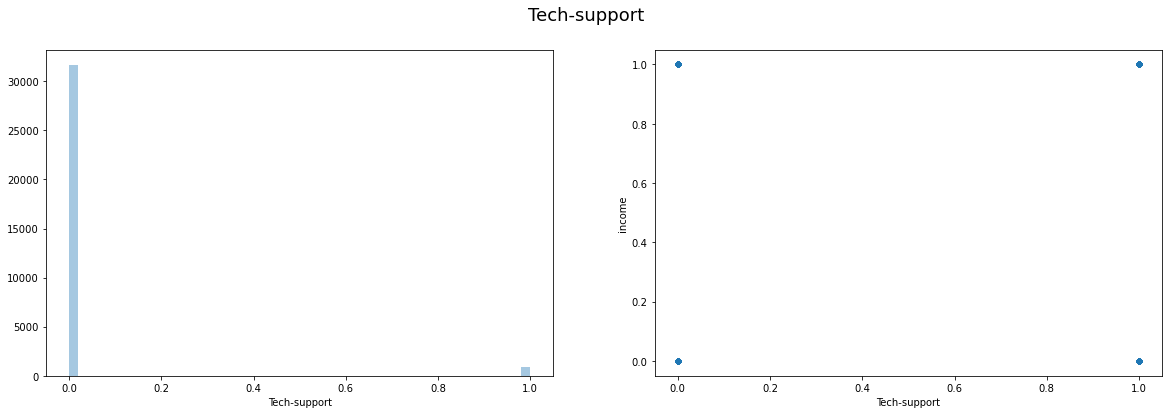

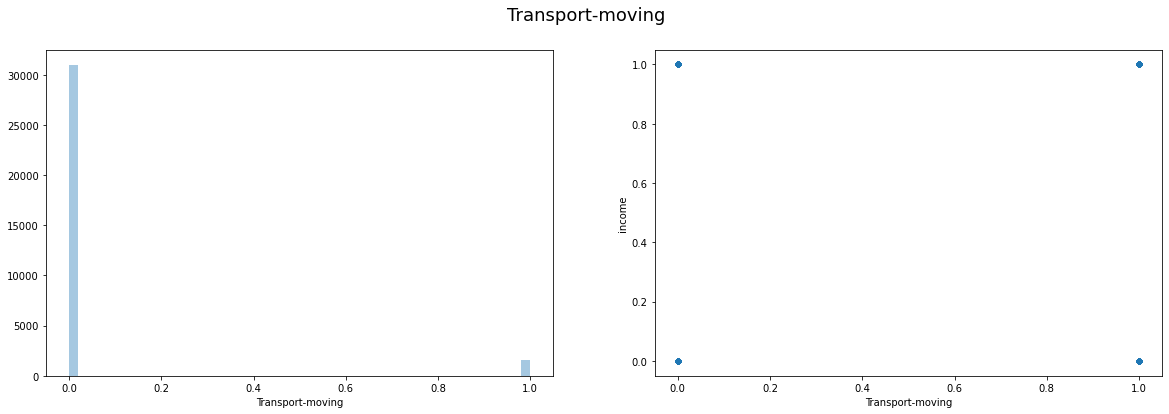

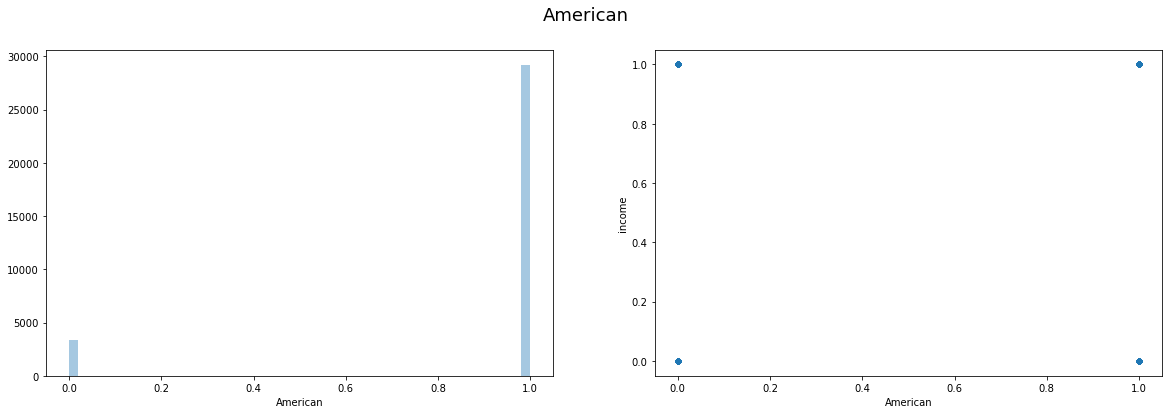

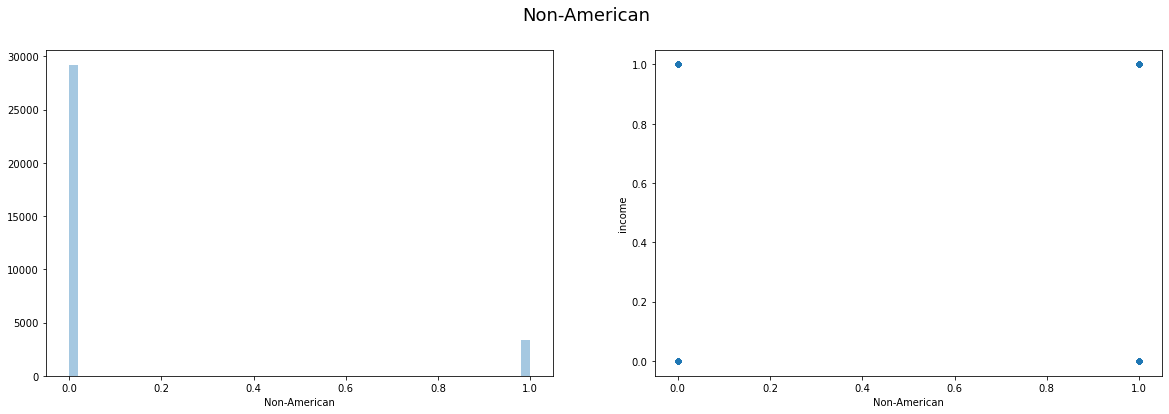

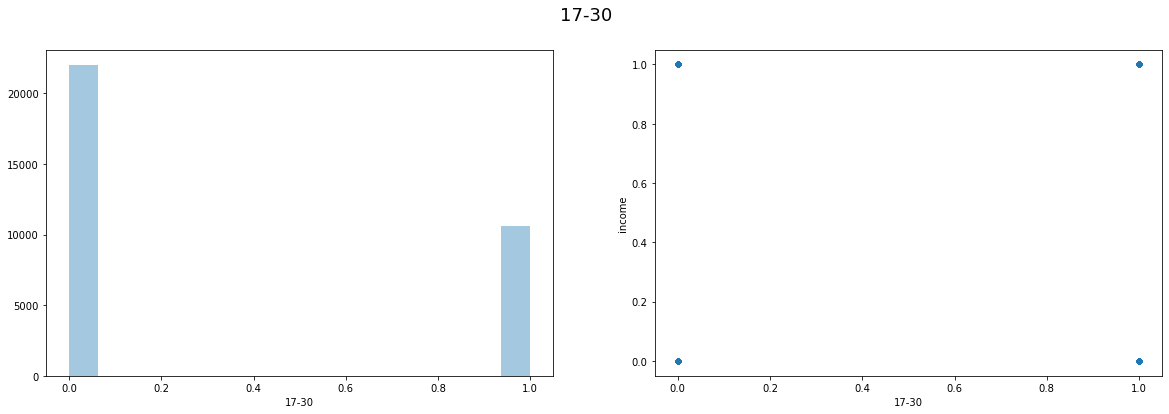

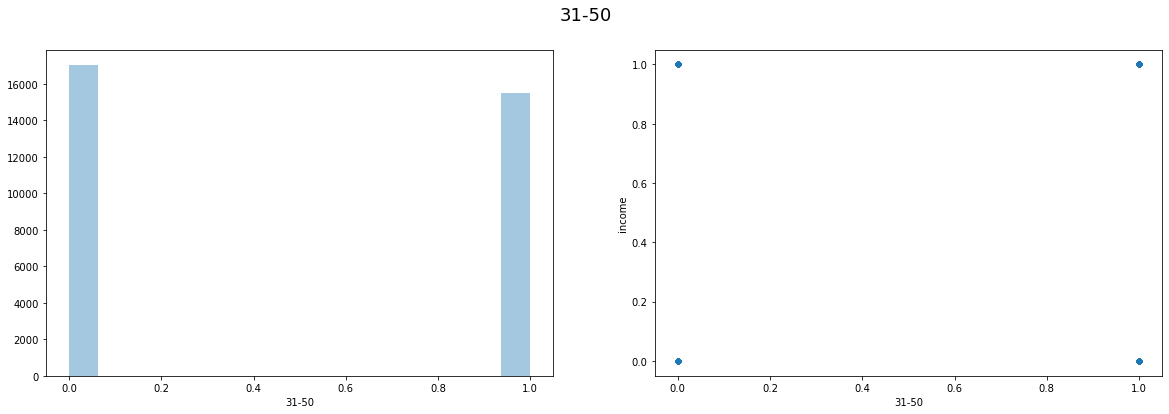

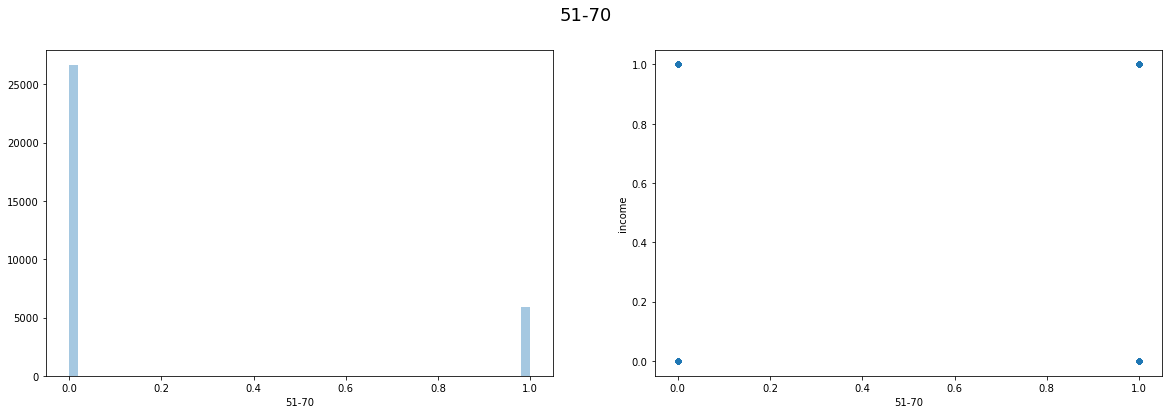

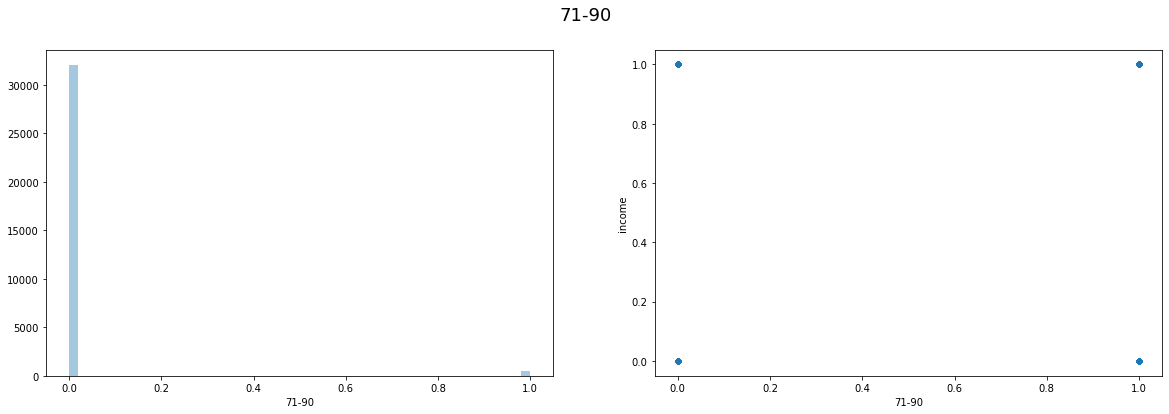

In [16]:
#Creamos un histograma con los valores de X con respecto a 'income'
columnas = np.array(data_frame.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['income']].plot.scatter(x=col, y='income', ax=ax[1])
    plt.show()

# Modelado

## Evaluación Regresión Logística

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score

#Se definen las variables a utilizar
X = data_frame.drop('income', axis=1)
y = data_frame['income']

#Se definen las variables de train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 29)

#Se utiliza el modelo y se muestra la precisión
modelo = GaussianNB()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
print('Precisión del modelo:',modelo.score(X_train,y_train))

Precisión del modelo: 0.797051597051597


<AxesSubplot:title={'center':'Matriz de confusion'}>

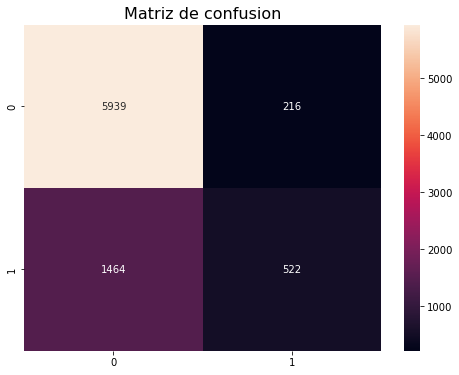

In [18]:
#Se importa la regresión logistica
from sklearn.linear_model import LogisticRegression

#Se definen las variables a utilizar
lr = LogisticRegression(random_state=29)
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
accuracy = round(accuracy_score(y_test,preds)*100,2)

#Se muestra la matriz de confusión para el modelo
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm, annot=True, fmt='g')

# Evaluacion

In [65]:
#Se importa la libreria metrics que permite ver las diferentes medidas de los modelos
from sklearn import metrics

#Se define la variable que se utilizará para obtener la métrica
y_pred_prob = lr.predict_proba(X_test)[::,1]

#Se realiza el cálculo de AUC
auc = metrics.roc_auc_score(y_test,y_pred_prob)

print('AUC:',auc)

AUC: 0.585689387041541


## Naive Bayes 

In [21]:
#Se definen las variables de train_test_split para realizar el modelo Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

#Se muestran casos positivos en Train y Test
print(f'''Casos positivos en Train = {np.round(y_train.value_counts(normalize=True)[1]*100,2)}%
Casos positivos en Test = {np.round(y_test.value_counts(normalize=True)[1]*100,2)}%''')

Casos positivos en Train = 23.98%
Casos positivos en Test = 24.4%


In [22]:
#Se importa la libreria SelectKBest
from sklearn.feature_selection import SelectKBest

#Se define las variables a utilizar en la matriz de correlacion, en este caso, todas las columnas
best=SelectKBest(k='all')
X_new = best.fit_transform(X,y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'Non-White', 'White', 'Gov', 'Never-pay', 'Private',
       'Self-emp', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'American', 'Non-American', '17-30', '31-50',
       '51-70', '71-90', '91-100'],
      dtype='object')


<AxesSubplot:title={'center':'Matriz de confusion'}>

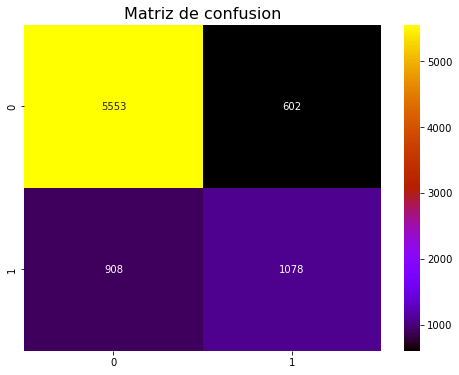

In [23]:
from sklearn.ensemble import RandomForestClassifier

#Entrenamiento del modelo
model = RandomForestClassifier(random_state=29)
model.fit(X_train, y_train)
preds = model.predict(X_test)

#Evaluar el modelo
cm =confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm,annot=True,cmap='gnuplot',fmt='g')

<AxesSubplot:title={'center':'Correlacion de columnas'}>

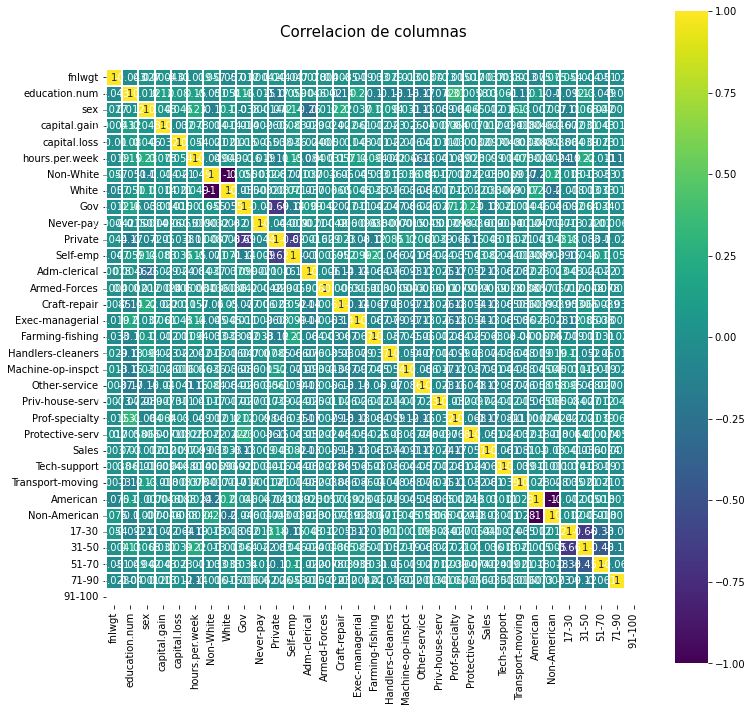

In [24]:
#Se muestra la correlación de columnas con los datos seleccionados anteriormente
used_features = X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlacion de columnas', y=1.05, size=15)
sns.heatmap(data_frame[used_features].astype(float).corr(),linewidth=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

### Evaluacion Naive Bayes con datos desbalanceados

In [25]:
print('Precision =', precision_score(y_test,preds))
print('Accuracy =', accuracy_score(y_test,preds))
print('F1 del modelo =', f1_score(y_test,preds))
print('Recall =', recall_score(y_test,preds))

Precision = 0.6416666666666667
Accuracy = 0.8145191008475617
F1 del modelo = 0.5881069285324605
Recall = 0.5427995971802618


In [35]:
#Se importa la tecnica SMOTE para balancear los datos
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=29)

X_sm, y_sm = sm.fit_resample(X, y)

#Se evidencia el cambio de la cantidad de datos
print(f'''Cambio de X antes de SMOTETomek: {X.shape}\nCambio de X despues de SMOTETomek: {X_sm.shape}''')

print('\n Balance positivo y negativo de las clases (%):')
y_sm.value_counts(normalize=True)*100

Cambio de X antes de SMOTETomek: (32561, 33)
Cambio de X despues de SMOTETomek: (43216, 33)

 Balance positivo y negativo de las clases (%):


0    50.0
1    50.0
Name: income, dtype: float64

<AxesSubplot:title={'center':'Matriz de confusion'}>

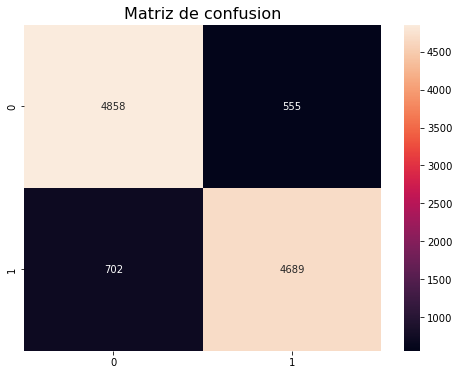

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=29)

model = RandomForestClassifier(random_state=29)
model.fit(X_train, y_train)
preds = model.predict(X_test)

#Se vuelve a realizar la matriz de confusión pero con los datos ya balanceados con SMOTE
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(8,6))
plt.title('Matriz de confusion', size=16)
sns.heatmap(cm, annot=True, fmt='g')

In [38]:
best=SelectKBest(k='all')
X_new = best.fit_transform(X_sm,y_sm)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['fnlwgt', 'education.num', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'Non-White', 'White', 'Gov', 'Never-pay', 'Private',
       'Self-emp', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'American', 'Non-American', '17-30', '31-50',
       '51-70', '71-90', '91-100'],
      dtype='object')


<AxesSubplot:title={'center':'Correlacion de columnas'}>

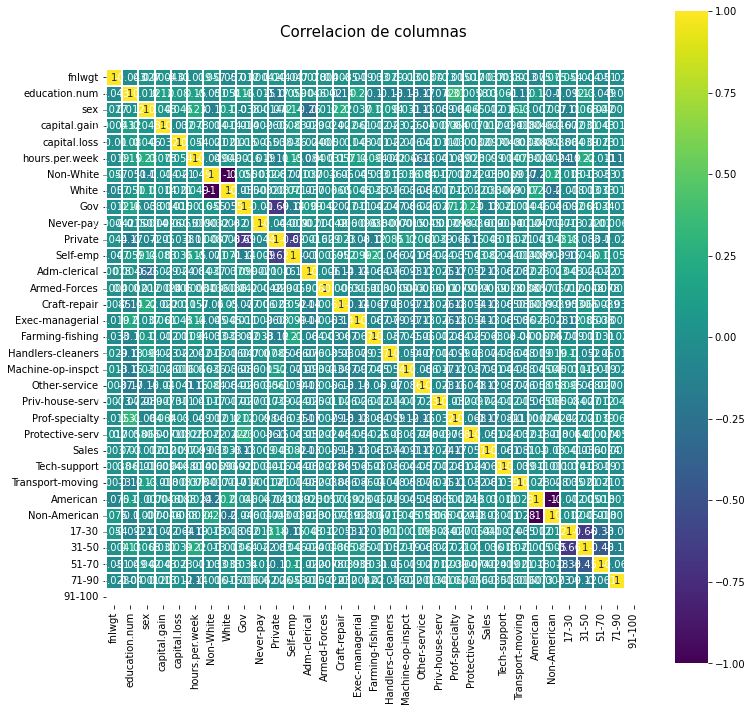

In [39]:
used_features = X.columns[selected]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))

#Se realiza la matriz de correlación pero con los datos ya balanceados con la tecnica SMOTE
plt.title('Correlacion de columnas', y=1.05, size=15)
sns.heatmap(data_frame[used_features].astype(float).corr(),linewidth=0.1,square=True, cmap=colormap, linecolor='white', annot=True)

### Evaluacion Naive Bayes con datos balanceados

In [40]:
print('Precision =', precision_score(y_test,preds))
print('Accuracy =', accuracy_score(y_test,preds))
print('F1 del modelo =', f1_score(y_test,preds))
print('Recall =', recall_score(y_test,preds))

Precision = 0.8941647597254004
Accuracy = 0.8836542021473528
F1 del modelo = 0.881805359661495
Recall = 0.8697829716193656


### Evaluacion de arbol de decisión

In [60]:
from sklearn.tree import DecisionTreeRegressor

#Se definen las variables a utilizar
X = data_frame.drop('income', axis=1)
y = data_frame['income']

#Se definen las variables a utilizar en train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)

#Entrenamiento
modelo.fit(X_train, y_train)

#Validacion
Y_pred = modelo.predict(X_test)
print('Precisión del modelo (en entrenamiento):', modelo.score(X_train,y_train))
print('Precisión del modelo (en validación):', modelo.score(X_test, y_test))


Precisión del modelo (en entrenamiento): 0.3442794992622622
Precisión del modelo (en validación): 0.3321605962070937


Profundidad del árbol: 5
Número de nodos terminales: 27


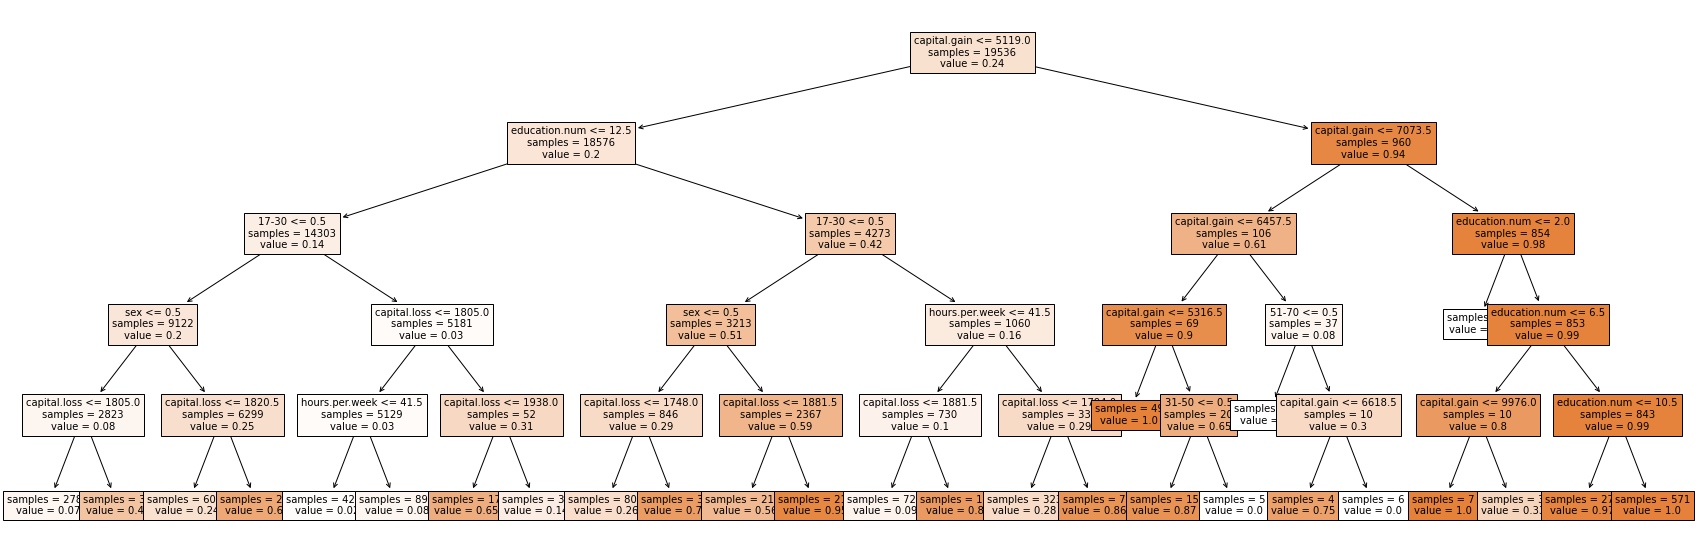

In [61]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(30, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

#Se definen las variables a utilizar en el arbol de decisión
plot= plot_tree(
            decision_tree = modelo,
            feature_names = data_frame.drop(columns = ["income"]).columns,
            class_names = 'income',
            filled = True,
            impurity = False,
            fontsize = 10,
            precision = 2,
            ax = ax
        )


# Conclusiones